In [31]:
# import required packages

import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score

In [2]:
## LOAD DATA

In [3]:
# display parent directory and working directory

print(os.path.dirname(os.getcwd())+':', os.listdir(os.path.dirname(os.getcwd())));
print(os.getcwd()+':', os.listdir(os.getcwd()));

C:\Users\sanch\OneDrive\Documents\GitHub: ['Chicago-Crime-Analysis', 'DarkArchiveWorkflow']
C:\Users\sanch\OneDrive\Documents\GitHub\Chicago-Crime-Analysis: ['.git', '.ipynb_checkpoints', 'Chicago Sex Crimes Analysis.ipynb', 'ChicagoCrimeAnalysis.docx', 'ChicagoCrimeData.pptx', 'ChicagoSexCrimesZipCodeData.csv', 'Chicago_Crimes_2001_to_2004.csv', 'Chicago_Crimes_2005_to_2007.csv', 'Chicago_Crimes_2008_to_2011.csv', 'Chicago_Crimes_2012_to_2017.csv', 'Chicago_ZipCode_Data.csv', 'Chicago_Zip_Data.csv', 'child_offenses.mp4', 'human_traff.mp4', 'LICENSE', 'map1.r', 'prostitution.mp4', 'README.md', 'SAL Project Code v10.1.ipynb', 'sex_assault.mp4', 'sex_offenses.mp4', 'stalking.mp4', 'theft_density_by_year.pdf', 'top30blocks.pdf']


In [4]:
# import data

Crime_5_7 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv.',
                        na_values = [None, 'NaN','Nothing'], header = 0) 
Crime_8_11 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv.',
                        na_values = [None, 'NaN','Nothing'], header = 0) 
Crime_12_17 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv.',
                        na_values = [None, 'NaN','Nothing'], header = 0)

C:\Users\sanch\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
Crime_Data = [Crime_5_7, Crime_8_11, Crime_12_17]
del Crime_5_7
del Crime_8_11
del Crime_12_17

In [6]:
# pre processing of data

In [7]:
# comebine dataframes

Crime_Data = pd.concat(Crime_Data,axis = 0)

In [8]:
# remove duplicates

Crime_Data.drop_duplicates(subset=['ID', 'Case Number'], inplace=True)

In [9]:
Crime_Data.drop(['Unnamed: 0','Case Number','IUCR','FBI Code','Updated On','Location',
                 'X Coordinate','Y Coordinate','Location'], inplace = True, axis = 1)

In [10]:
Crime_Data.Date = pd.to_datetime(Crime_Data.Date, format = '%m/%d/%Y %I:%M:%S %p')
Crime_Data.index = pd.DatetimeIndex(Crime_Data.Date)

In [11]:
# Convert Nominal features into categorical predictors

Crime_Data['Primary Type'] = pd.Categorical(Crime_Data['Primary Type'])
Crime_Data['Description'] = pd.Categorical(Crime_Data['Description'])
Crime_Data['Location Description'] = pd.Categorical(Crime_Data['Location Description'])

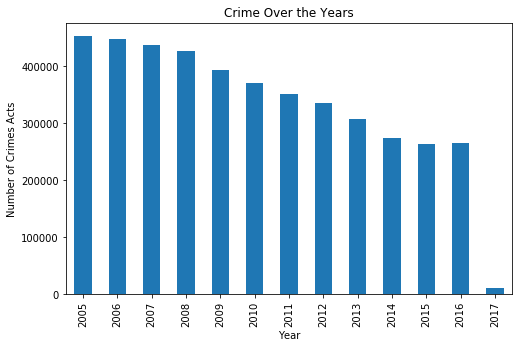

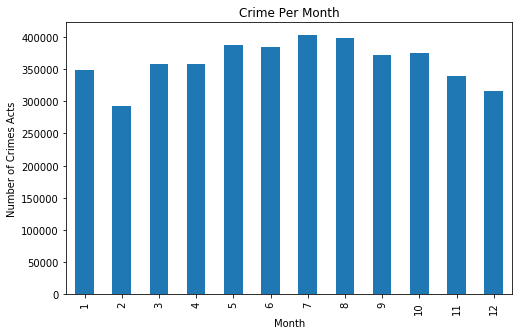

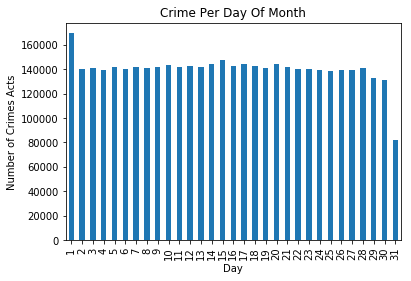

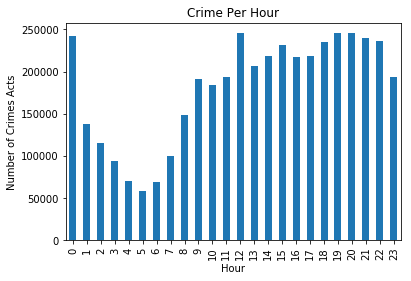

In [12]:
#make graph of crimes per year
plt.figure(figsize = (8,5))
Crime_Data.groupby([Crime_Data.index.year]).size().plot.bar()
plt.title('Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes Acts')
plt.show()
plt.figure(figsize = (8,5))
#make graph of crimes per month
Crime_Data.groupby([Crime_Data.index.month]).size().plot.bar()
plt.title('Crime Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes Acts')
plt.show()
#graph of crimes per day
Crime_Data.groupby([Crime_Data.index.day]).size().plot.bar()
plt.title('Crime Per Day Of Month')
plt.xlabel('Day')
plt.ylabel('Number of Crimes Acts')
plt.show()
#graph of crimes per hour
Crime_Data.groupby([Crime_Data.index.hour]).size().plot.bar()
plt.title('Crime Per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Crimes Acts')
plt.show()

In [13]:
Crime_Data_date = Crime_Data.pivot_table('ID', aggfunc = np.size, columns = 'Primary Type', 
                                         index = Crime_Data.index.date, fill_value = 0)
Crime_Data_date.index = pd.DatetimeIndex(Crime_Data_date.index)

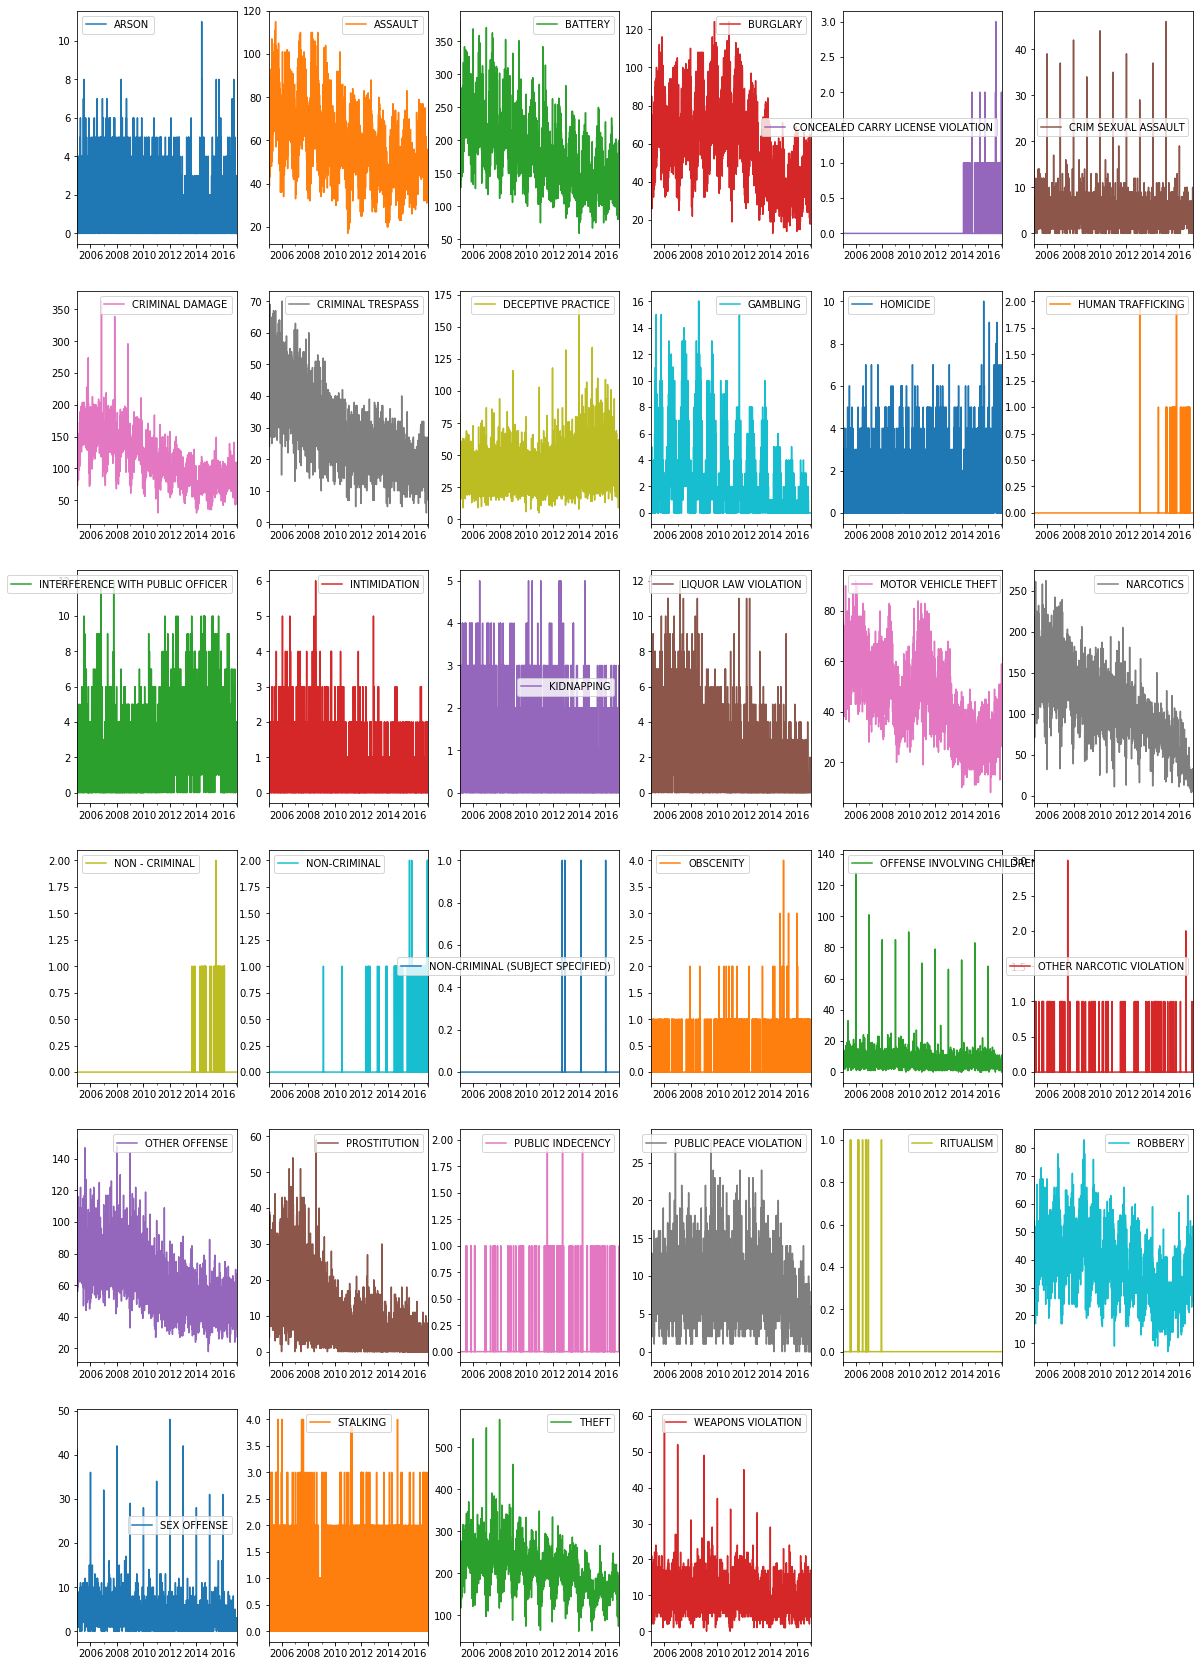

In [14]:
# visualize different types of crimes per month
Plot = Crime_Data_date.plot(figsize = (20,30), subplots = True, layout = (6,6),
                                  sharex = False, sharey = False)
plt.show()

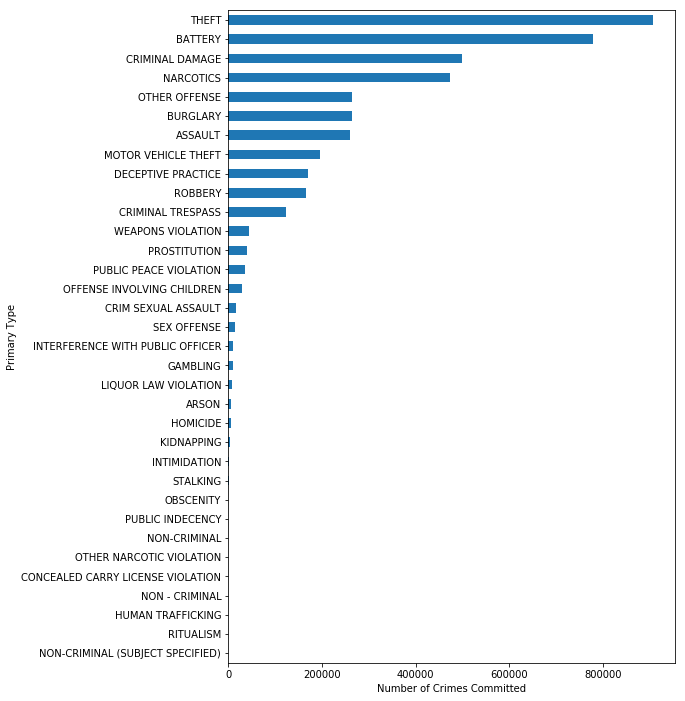

In [15]:
# visualize relative amounts of each type of crime
plt.figure(figsize = (8,12))
Crime_Data.groupby(Crime_Data['Primary Type']).size().sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel('Number of Crimes Committed')
plt.show()

In [16]:
Crime_Data_district = Crime_Data.pivot_table('Arrest', aggfunc = np.sum, columns = ['District'], 
                                         index = Crime_Data.index.date, fill_value = 0)
Crime_Data_ward = Crime_Data.pivot_table('Arrest', aggfunc = np.sum, columns = ['Ward'], 
                                         index = Crime_Data.index.date, fill_value = 0)
Crime_Data_ca = Crime_Data.pivot_table('Arrest', aggfunc = np.sum, columns = ['Community Area'], 
                                         index = Crime_Data.index.date, fill_value = 0)

C:\Users\sanch\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
C:\Users\sanch\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\sanch\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
C:\Users\sanch\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  del sys.path[0]
C:\Users\sanch\Anacond

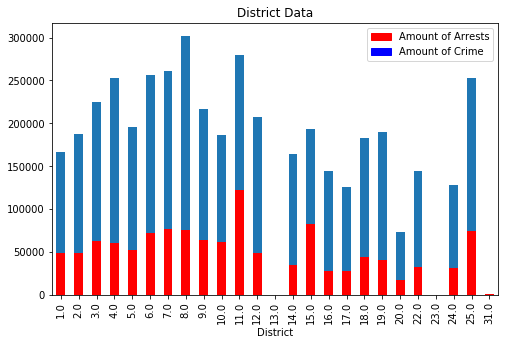

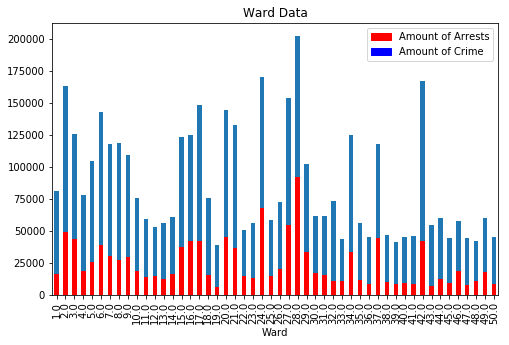

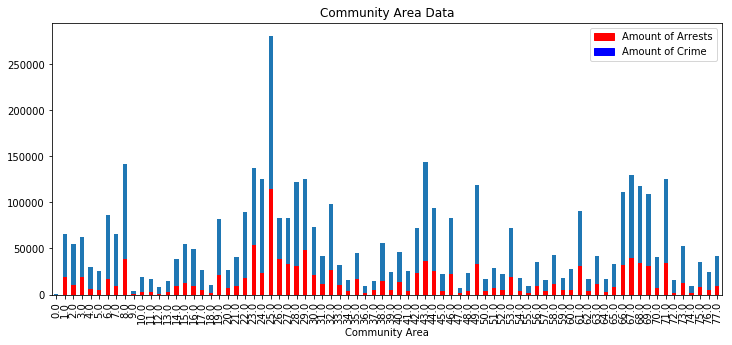

In [17]:
import matplotlib.patches as mpatches
red = mpatches.Patch(color='red', label='Amount of Arrests')
blue = mpatches.Patch(color='blue', label='Amount of Crime')


#crime per district
plt.figure(figsize = (8,5))
plt.hold(True)
Crime_Data.groupby(Crime_Data['District']).size().plot(kind = 'bar')
Crime_Data_district.sum().plot(kind = 'bar', color = 'r')
plt.title('District Data')
plt.legend(handles=[red, blue])
plt.hold(False)
#crime per ward
plt.figure(figsize = (8,5))
plt.hold(True)
Crime_Data.groupby(Crime_Data['Ward']).size().plot(kind = 'bar')
Crime_Data_ward.sum().plot(kind = 'bar', color = 'r')
plt.title('Ward Data')
plt.legend(handles=[red, blue])
plt.hold(False)
#crime per Community Area
plt.figure(figsize = (12,5))
plt.hold(True)
Crime_Data.groupby(Crime_Data['Community Area']).size().plot(kind = 'bar')
Crime_Data_ca.sum().plot(kind = 'bar', color = 'r')
plt.title('Community Area Data')
plt.legend(handles=[red, blue])
plt.hold(False)
plt.show()

C:\Users\sanch\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\sanch\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


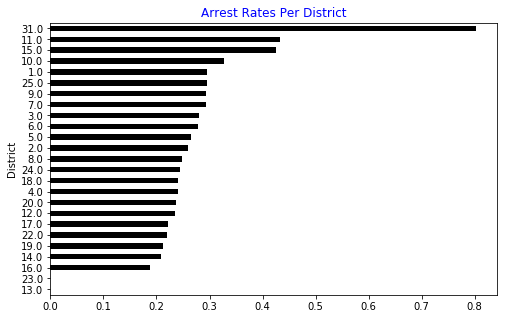

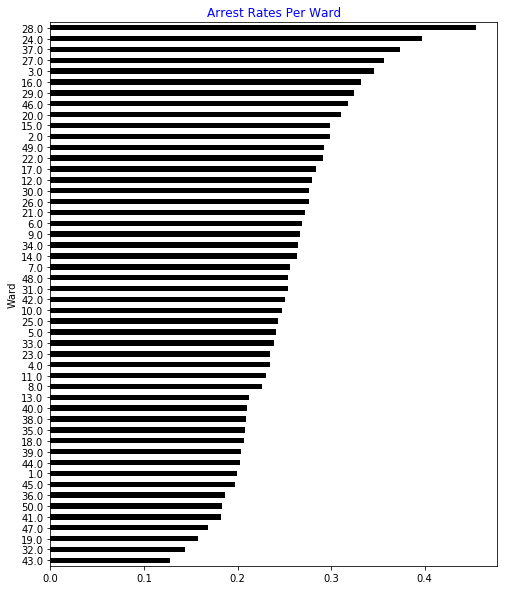

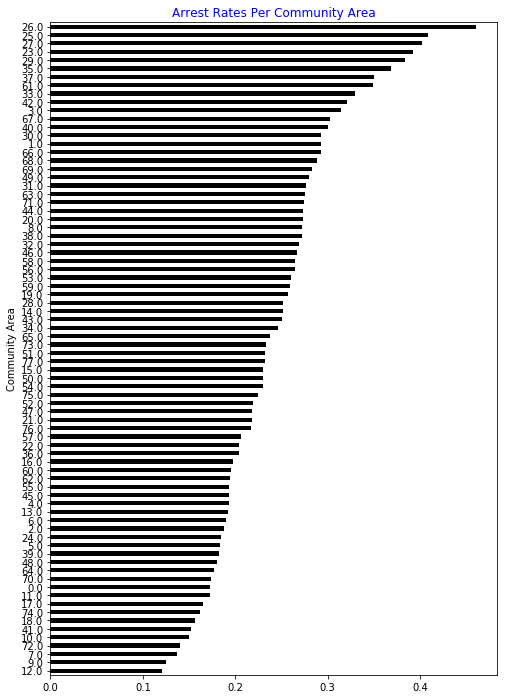

In [18]:
#Arrest rates per community area, ward, and district
A_R_D = Crime_Data_district.sum() / Crime_Data.groupby(Crime_Data['District']).size()
A_R_W = Crime_Data_ward.sum() / Crime_Data.groupby(Crime_Data['Ward']).size()
A_R_CA = Crime_Data_ca.sum() / Crime_Data.groupby(Crime_Data['Community Area']).size()

plt.figure(figsize = (8,5))
A_R_D.sort_values().plot(kind = 'barh', color = 'k')
plt.title('Arrest Rates Per District', color = 'b')
plt.figure(figsize = (8,10))
A_R_W.sort_values().plot(kind = 'barh', color = 'k')
plt.title('Arrest Rates Per Ward', color = 'b')
plt.figure(figsize=(8,12))
A_R_CA.sort_values().plot(kind = 'barh', color = 'k')
plt.title('Arrest Rates Per Community Area', color = 'b')
plt.show()

C:\Users\sanch\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
C:\Users\sanch\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\sanch\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
C:\Users\sanch\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  # This is added back by InteractiveShe

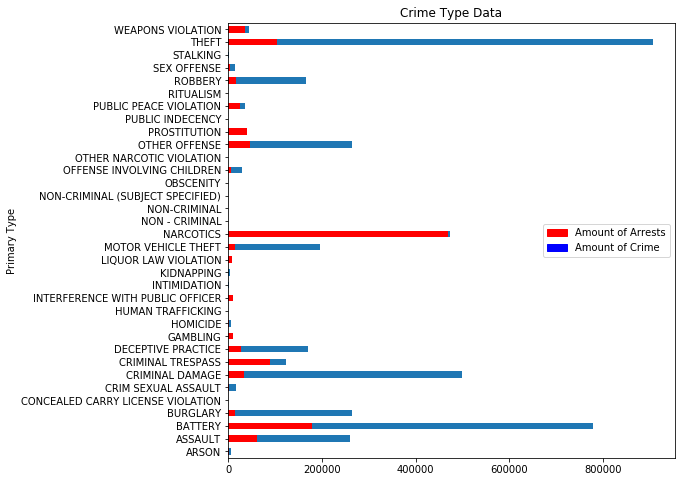

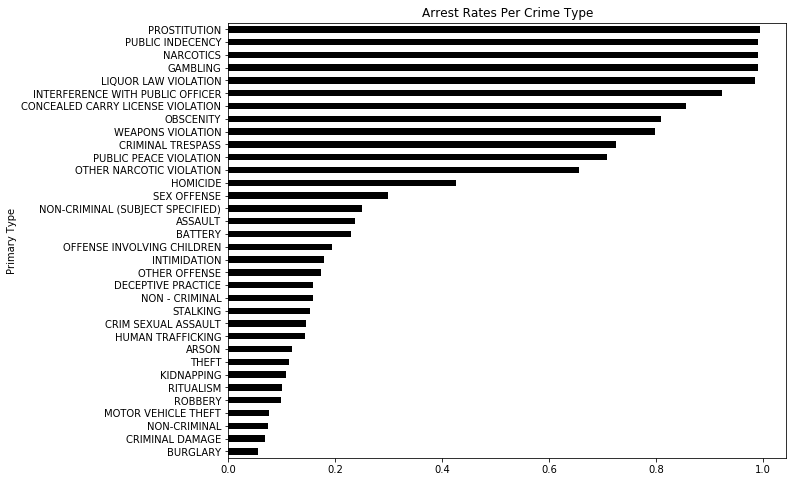

In [19]:
#Arrest rates per crime type
Crime_Data_Type = Crime_Data.pivot_table('Arrest', aggfunc = np.sum, columns = ['Primary Type'], 
                                         index = Crime_Data.index.date, fill_value = 0)
#crime per district
plt.figure(figsize = (8,8))
plt.hold(True)
Crime_Data.groupby(Crime_Data['Primary Type']).size().plot(kind = 'barh')
Crime_Data_Type.sum().plot(kind = 'barh', color = 'r')
plt.title('Crime Type Data')
plt.legend(handles=[red, blue])
plt.hold(False)

plt.figure(figsize = (10,8))
A_R_PT = Crime_Data_Type.sum() / Crime_Data.groupby(Crime_Data['Primary Type']).size()
A_R_PT.sort_values().plot(kind = 'barh', color = 'k')
plt.title('Arrest Rates Per Crime Type')
plt.show()

In [20]:
#remove NAs from Longitude and Latitude data
Crime_Data = Crime_Data.dropna(axis = 0, how = 'any')

In [21]:
# drop bad data points

Crime_Data = Crime_Data[Crime_Data.Longitude != '-87.1:00:00 AM']

In [22]:
Arrest_Data = Crime_Data.drop('Arrest', axis = 1)
Arrest_Data = Arrest_Data.drop('Date', axis = 1)
Arrest_Data = Arrest_Data.drop('Block', axis = 1)
Arrest_Target = Crime_Data['Arrest']

In [23]:
Arrest_Data['Primary Type'] = (Arrest_Data['Primary Type']).cat.codes
Arrest_Data['Location Description'] = (Arrest_Data['Location Description']).cat.codes
Arrest_Data['Description'] = (Arrest_Data['Description']).cat.codes

In [24]:
Arrest_Data.head()

,ID,Primary Type,Description,Location Description,Domestic,Beat,District,Ward,Community Area,Year,Latitude,Longitude
Date,,,,,,,,,,,,
2006-04-02 13:00:00,4673626,24,173,123,False,1622,16.0,45.0,11.0,2006,41.981913,-87.772
2006-02-26 13:40:48,4673627,17,218,139,False,321,3.0,20.0,42.0,2006,41.775733,-87.6119
2006-01-08 23:16:00,4673628,1,40,110,False,321,3.0,5.0,69.0,2006,41.769897,-87.5937
2006-04-05 18:45:00,4673629,2,309,123,False,1633,16.0,38.0,17.0,2006,41.942984,-87.7801
2006-02-17 21:03:14,4673630,17,267,15,False,822,8.0,13.0,65.0,2006,41.784211,-87.7167


In [25]:
Arrest_Target.head()

Date
2006-04-02 13:00:00    False
2006-02-26 13:40:48     True
2006-01-08 23:16:00    False
2006-04-05 18:45:00    False
2006-02-17 21:03:14     True
Name: Arrest, dtype: bool

In [26]:
## BUILDING MODELS

In [ ]:
## Problem Statement 1 - Classification of Arrests

In [27]:
## Naive Bayes 

gnb = GaussianNB()
scores_nb = cross_val_score(gnb, Arrest_Data, Arrest_Target)
scores_nb.mean()

0.68343039404361017

In [28]:
## Decision Tree 

tree_entropy = DecisionTreeClassifier(criterion="entropy")
scores_dt = cross_val_score(tree_entropy, Arrest_Data, Arrest_Target)
scores_dt.mean()

0.56527942245544827

In [32]:
## Random Forest

rfc = RandomForestClassifier(n_estimators = 10, oob_score = True, n_jobs = -1)
scores_rfc = cross_val_score(rfc, Arrest_Data, Arrest_Target)
scores_rfc.mean()

C:\Users\sanch\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\sanch\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\sanch\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\sanch\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\sanch\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably me

0.5681738278114935

In [ ]:
## KNN

#normalize data
mms = MinMaxScaler()
Arrest_Data_norm = mms.fit_transform(Arrest_Data)

knn = KNeighborsClassifier(n_neighbors=3)
scores_knn = cross_val_score(knn, Arrest_Data_norm, Arrest_Target)
scores_knn.mean()

In [ ]:
## SVC

#standardize data
ss = StandardScaler()
Arrest_Data_scaled = ss.fit_transform(Arrest_Data)

svc = LinearSVC()
scores_svc = cross_val_score(svc, Arrest_Data_scaled, Arrest_Target)
scores_svc.mean()


In [ ]:
## Logistic Regression

logreg = LogisticRegression()
scores_logreg = cross_val_score(logreg, Arrest_Data, Arrest_Target)
scores_logreg.mean()